In [1]:
#Using Iris dataset

#Reference: https://www.kaggle.com/bburns/iris-exploration-pca-k-means-and-gmm-clustering/data

# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [3]:
#Data Exploration

# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'SepalLengthCm':iris.data[:,0],
    'SepalWidthCm':iris.data[:,1],
    'PetalLengthCm':iris.data[:,2],
    'PetalWidthCm':iris.data[:,3],
    'Species':iris.target
})
data.head()

,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm,Species
0,1.4,0.2,5.1,3.5,0
1,1.4,0.2,4.9,3.0,0
2,1.3,0.2,4.7,3.2,0
3,1.5,0.2,4.6,3.1,0
4,1.4,0.2,5.0,3.6,0


In [6]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

     PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm
32             1.5           0.1            5.2           4.1
106            4.5           1.7            4.9           2.5
77             5.0           1.7            6.7           3.0
58             4.6           1.3            6.6           2.9
13             1.1           0.1            4.3           3.0
20     0
109    2
87     1
13     0
133    2
Name: Species, dtype: int32


In [7]:
# see how many samples we have of each species 
data["Species"].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

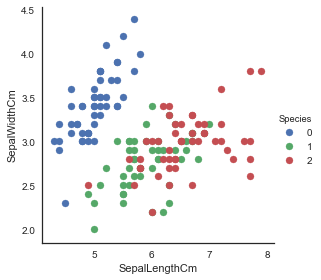

In [8]:
# use seaborn to make scatter plot showing species for each sample
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

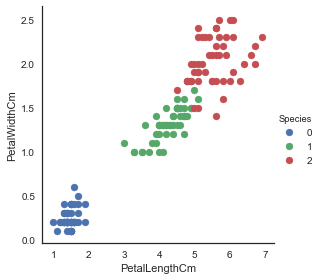

In [9]:
# do same for petals
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

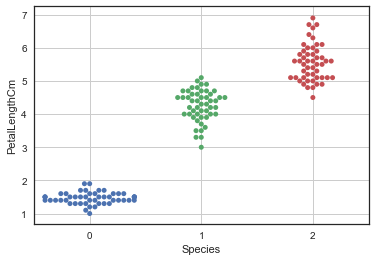

In [12]:
# show petal length distributions in a swarm plot - 
# just shows one dimension of the data, so not as useful as the previous plots
sns.swarmplot(x="Species", y="PetalLengthCm", data=data)
plt.grid()

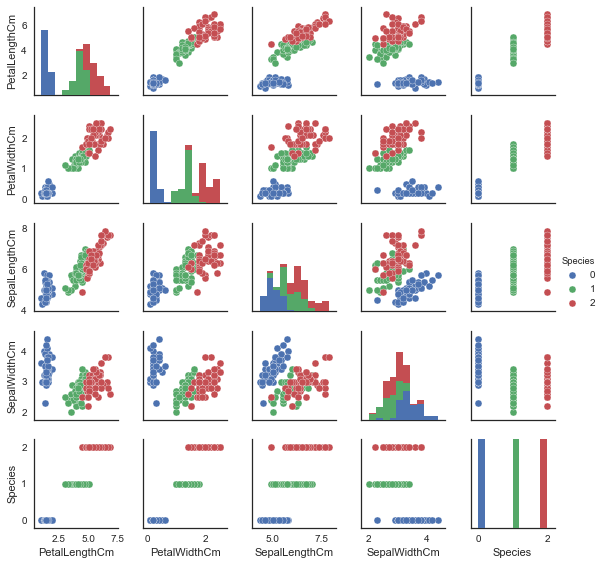

In [13]:
# make a scatter matrix showing each pair of features in the data.
# seaborn can show the species labels as different colors, but
# normally with EDA you wouldn't have that information. 
# note: the semicolon at the end just hides a line of text output.
sns.pairplot(data, hue="Species", diag_kind="hist", size=1.6);

In [ ]:
# so again, this shows how similar versicolor and virginica are, at least with the given features.

# but there could be features that you didn't measure that would more clearly separate the species.

# it's the same for any unsupervised learning - you need to have the right features to separate the groups in the best way.

In [14]:
#Feature Scaling
## the data is unbalanced (eg sepallength ~4x petalwidth), so should do feature scaling,
# otherwise the larger features will dominate the others in clustering, etc.

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm
36,-1.398138,-1.312977,-0.416010,1.032057
1,-1.341272,-1.312977,-1.143017,-0.124958
73,0.535296,0.001753,0.310998,-0.587764
135,1.331416,1.447956,2.249683,-0.124958
51,0.421564,0.396172,0.674501,0.337848


In [53]:
# K-Means Clustering
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [54]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.4589717867018717

In [68]:
#Calculating purity:    Reference: https://www.kaggle.com/saptarsi/kmedoid-sg
#Evaluating Purity: https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html
#Values close to 1--> good clusters

contingency_matrix1 = metrics.cluster.contingency_matrix(y,y_cluster_kmeans)
contingency_matrix1

array([[ 0, 50,  0],
       [39,  0, 11],
       [14,  0, 36]])

In [69]:
np.amax(contingency_matrix1, axis=0) #finding maximum elements of rows

array([39, 50, 36])

In [74]:
x = np.sum(np.amax(contingency_matrix1, axis=0)) #Sum of max. elements from each row
x

In [75]:
y = np.sum(contingency_matrix1)  #total sum of all elements in contingency matrix
y

150

In [88]:
purity = float(x)/float(y) 
purity

0.8333333333333334

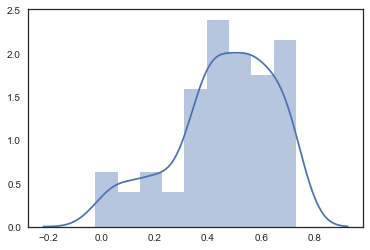

In [17]:
# note that this is the mean over all the samples - there might be some clusters 
# that are well separated and others that are closer together. 
# so let's look at the distribution of silhouette scores...
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

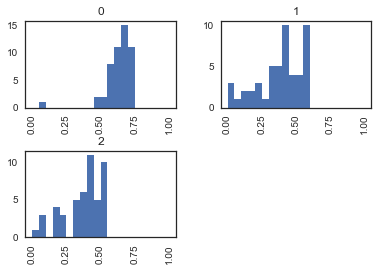

In [18]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = data['Species']
df_scores.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=20);

# so as expected, versicolor (1) and virginica (2) have lower silhouette scores than 
# the more separate setosas (0), because they are closer together.

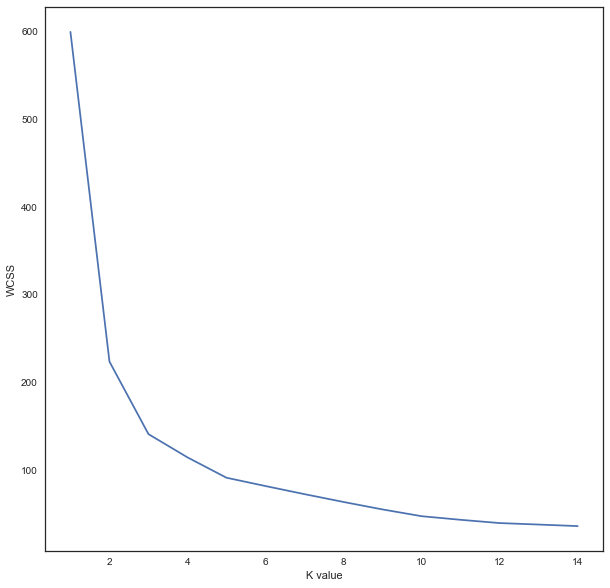

In [20]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(X_scaled)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

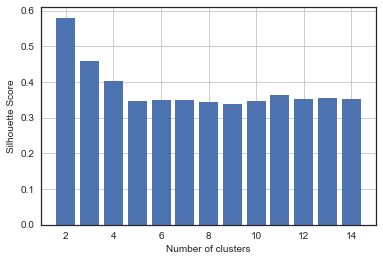

In [22]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(X_scaled, KMeans(n_clusters = n_cluster).fit_predict(X_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

In [23]:
nclusters = 2 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.580184463257396

In [26]:
km.inertia_

223.73200573676343

In [27]:
km.cluster_centers_

array([[-1.30487835, -1.25512862, -1.01457897,  0.84230679],
       [ 0.65243918,  0.62756431,  0.50728948, -0.4211534 ]])

In [ ]:
#k-means vs k-medoids vs k-means++
#Reference: https://towardsdatascience.com/understanding-k-means-k-means-and-k-medoids-clustering-algorithms-ad9c9fbf47ca

#k-means++: https://www.geeksforgeeks.org/ml-k-means-algorithm/

#k-medoids reference: https://www.kaggle.com/saptarsi/kmedoid-sg


In [28]:
#Problem 2: Customer segmentation using k-means

# Mall customers dataset
#Source of dataset: https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation
#Reference: https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation

#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Visualization


In [29]:
#Import the dataset

dataset = pd.read_csv("C:/Users//user//Desktop//FORE Documents//Courses//Big Data Analytics for Managers (Python)//Session 12-13//Mall_Customers.csv")

In [30]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
#total rows and colums in the dataset
dataset.shape

(200, 5)

In [32]:
dataset.info() # there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
#Missing values computation
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [34]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= dataset.iloc[:, [3,4]].values

In [35]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

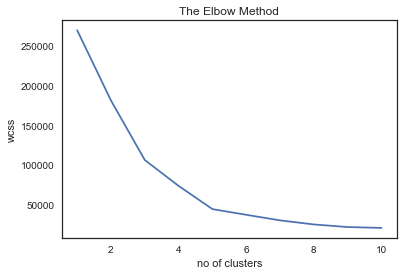

In [36]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [37]:
#Model Build   (K-means)
kmeansmodel = KMeans(n_clusters= 5, random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

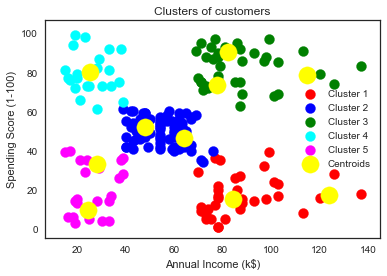

In [38]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

###Model Interpretation 
#Cluster 1 (Red Color) -> earning high but spending less
#cluster 2 (Blue Colr) -> average in terms of earning and spending 
#cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
#cluster 4 (cyan Color) -> earning less but spending more
#Cluster 5 (magenta Color) -> Earning less , spending less

In [40]:
score = metrics.silhouette_score(X, y_kmeans)
score

0.553931997444648

In [42]:
#Model Build   (K-means)
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [43]:
score = metrics.silhouette_score(X, y_kmeans)
score

0.553931997444648

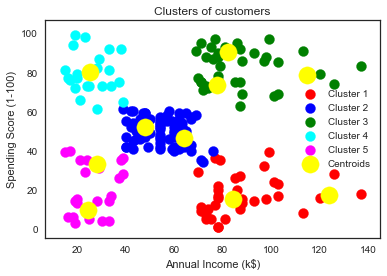

In [46]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()